<a href="https://colab.research.google.com/github/kshitijashelar/LinearRegression/blob/master/Lab_08_Task_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 8 Tasks Solution

Step 1. Download a subset of the 2019 World Happiness Index data from the link below, and load the data into a Pandas Data Frame

http://mlg.ucd.ie/modules/COMP41680/happiness2019.csv

The fields in the data correspond to the following measures:
- *country*: name of the country for each row
- *gdp*: real GDP per capita
- *social_support*: amount of social support that is present in a country
- *health*: healthy life expectancy
- *freedom*: freedom to make life choices 
- *generosity*: leve of generosity of citizens
- *corruption*: perceptions of corruption in a country

In [1]:
import pandas as pd
df = pd.read_csv("http://mlg.ucd.ie/modules/COMP41680/happiness2019.csv",index_col="country")
df.head(10)

,gdp,social_support,health,freedom,generosity,corruption
country,,,,,,
Afghanistan,0.350,0.517,0.361,0.000,0.158,0.025
Albania,0.947,0.848,0.874,0.383,0.178,0.027
Algeria,1.002,1.160,0.785,0.086,0.073,0.114
Argentina,1.092,1.432,0.881,0.471,0.066,0.050
Armenia,0.850,1.055,0.815,0.283,0.095,0.064
Australia,1.372,1.548,1.036,0.557,0.332,0.290
Austria,1.376,1.475,1.016,0.532,0.244,0.226
Azerbaijan,1.043,1.147,0.769,0.351,0.035,0.182
Bahrain,1.362,1.368,0.871,0.536,0.255,0.110


Step 2. Calculate basic summary statistics for the data. List the top 5 ranked countries for each measure.

In [2]:
df.describe()

,gdp,social_support,health,freedom,generosity,corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [3]:
from IPython.display import display
for column in df.columns:
    print("Measure: %s" % column )
    display( df.nlargest(5, column)[[column]] )

Measure: gdp


,gdp
country,
Qatar,1.684
Luxembourg,1.609
Singapore,1.572
United Arab Emirates,1.503
Kuwait,1.500


Measure: social_support


,social_support
country,
Iceland,1.624
Finland,1.587
Norway,1.582
Denmark,1.573
New Zealand,1.557


Measure: health


,health
country,
Singapore,1.141
Hong Kong,1.122
Japan,1.088
Spain,1.062
Switzerland,1.052


Measure: freedom


,freedom
country,
Uzbekistan,0.631
Cambodia,0.609
Norway,0.603
United Arab Emirates,0.598
Finland,0.596


Measure: generosity


,generosity
country,
Myanmar,0.566
Indonesia,0.498
Haiti,0.419
Malta,0.375
Kenya,0.372


Measure: corruption


,corruption
country,
Singapore,0.453
Rwanda,0.411
Denmark,0.410
Finland,0.393
New Zealand,0.380


Step 3. Generate a boxplot of the measures in the dataset.

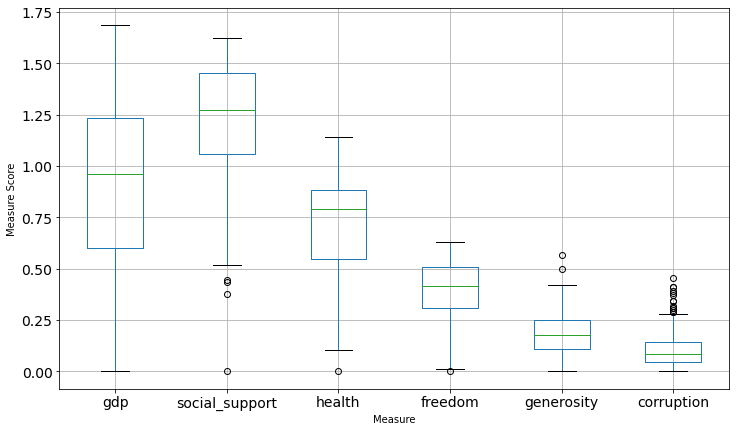

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
df.boxplot(figsize=(12,7), fontsize=14)
plt.xlabel( "Measure" )
plt.ylabel( "Measure Score" );

Step 4. Apply a simple linear regression to learn (fit) the model, where *gdp* is the independent variable and *health* is the target variable that we would like to predict. Produce a plot of the regression line.

Model intercept is [0.26564776]
Model slope is [0.50775798]


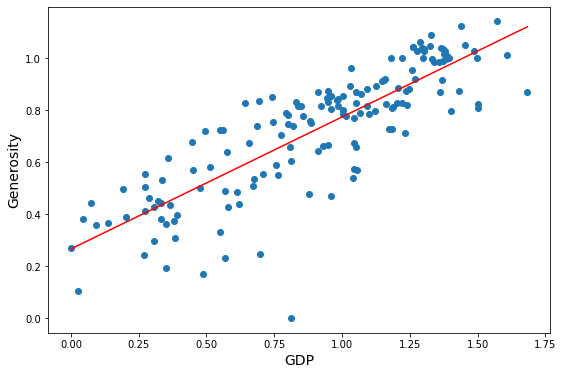

In [5]:
# Get the columns
x = df[["gdp"]].values
y = df[["health"]].values
# Now build the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])
# plot the data
plt.figure(figsize=(9,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('GDP', fontsize=14)
plt.ylabel('Generosity', fontsize=14);

Step 5. Repeat the process from Step 4, but this time use *generosity* as the **target** variable. What does a comparison of the two regression lines indicate?

Model intercept is [0.20208664]
Model slope is [-0.01904716]


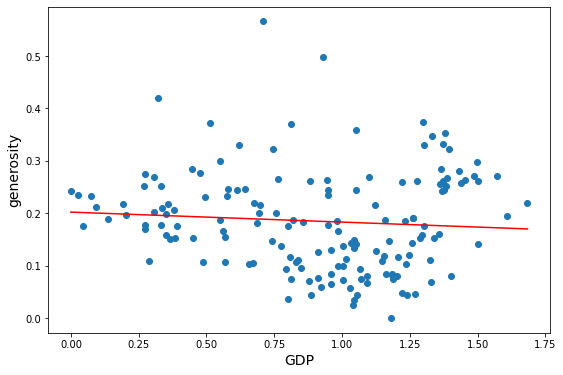

In [6]:
# Get the columns
x = df[["gdp"]].values
y = df[["generosity"]].values
# Now build the regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
print("Model intercept is", model.intercept_)
print("Model slope is", model.coef_[0])
# plot the data
plt.figure(figsize=(9,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('GDP', fontsize=14)
plt.ylabel('generosity', fontsize=14);

There appears to be a strong correlation between GDP per capita and healthy life expectancy, for far less correlation between GDP per capita and generosity (i.e. level of charitable donations).

In [7]:
df.corr()

,gdp,social_support,health,freedom,generosity,corruption
gdp,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
social_support,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
health,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
freedom,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
generosity,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
corruption,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000
